In [1]:
import numpy as np
from PIL import Image
import a2

# Read the image 

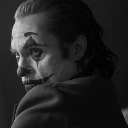

In [2]:
image = Image.open("joker.jpeg")
size = (128, 128)
image = image.resize(size)
image = image.convert("L")
image

# binarize the image and read it back with no noise

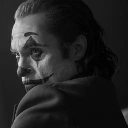

In [3]:
image = np.array(image)
bin_ = a2.binarize(image)
debin = a2.de_binarize(bin_,image.shape[0], image.shape[1])
Image.fromarray(debin)

# Adding noise to Tx bits without convolutional codes

In [4]:
# Threshold function. Outputs 1 if input is > 0.5 and 0 otherwise. Simulates hard decision thresholding for unipolor code
thresh = lambda x: 1 if x > 0.5 else 0 

### With SNR = 1 (linear not in dB)

Root mean square error = 8.008338397365508


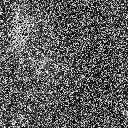

In [5]:
SNR = 1
awgn = np.random.normal(scale = np.sqrt(1/SNR), size = len(bin_))

bin_with_noise = list(map(thresh, awgn + bin_))
debin_with_noise = a2.de_binarize(bin_with_noise,image.shape[0], image.shape[1])
decoded = Image.fromarray(debin_with_noise)
print(f"Root mean square error = {a2.rmse(image,decoded)}")
Image.fromarray(debin_with_noise)

### With SNR = 10 (linear not in dB)

Root mean square error = 2.643247126375767


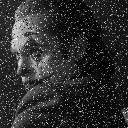

In [20]:
SNR = 10
awgn = np.random.normal(scale = np.sqrt(1/SNR), size = len(bin_))

bin_with_noise = list(map(thresh, awgn + bin_))

debin_with_noise = a2.de_binarize(bin_with_noise,image.shape[0], image.shape[1])
decoded = Image.fromarray(debin_with_noise)
print(f"Root mean square error = {a2.rmse(image,decoded)}")
Image.fromarray(debin_with_noise)

### With SNR = 30 (linear not in dB)

409
Root mean square error = 0.48538201771903333


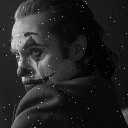

In [59]:
SNR = 30
awgn = np.random.normal(scale = np.sqrt(1/SNR), size = len(bin_))

bin_with_noise = list(map(thresh, awgn + bin_))
print(sum(bin_with_noise != bin_))
debin_with_noise = a2.de_binarize(bin_with_noise,image.shape[0], image.shape[1])
decoded = Image.fromarray(debin_with_noise)
print(f"Root mean square error = {a2.rmse(image,decoded)}")
Image.fromarray(debin_with_noise)

# Repeating the same process, but with convolutional channel codes

In [8]:
encoded = a2.encoder(bin_)

In [52]:
np.array(encoded) +awgn


array([ 0.03419314, -0.18996274,  0.12567879, ...,  1.07820392,
       -0.40602549,  0.59402978])

39878
Root mean square error = 6.430100419608546


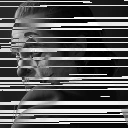

In [63]:
SNR = 20
awgn = np.random.normal(scale = np.sqrt(1/SNR), size = len(encoded))
bin_with_noise = list(map(thresh, awgn + np.array(encoded)))
decoded_bin_with_noise = a2.decode(bin_with_noise)
print(sum(decoded_bin_with_noise != bin_))
debin_with_noise = a2.de_binarize(decoded_bin_with_noise,image.shape[0], image.shape[1])
decoded = Image.fromarray(debin_with_noise)
print(f"Root mean square error = {a2.rmse(image,decoded)}")
decoded

In [27]:
def binarize_bools(image):
    output = []
    for row in image:
        for pixel in row:
            output.extend(list(map(bool,list(map(lambda x: int(x), list(f"{pixel:08b}"))))))
    return np.array(output, dtype= bool)

def binarize(image):
    output = []
    for row in image:
        for pixel in row:
            output.extend(list(map(lambda x: int(x), list(f"{pixel:08b}"))))
    return output

def de_binarize(bitstream, rows, cols):
    image = np.zeros((rows,cols), dtype = np.uint8)
    for pixel in range(rows*cols):
        a = bitstream[pixel*8: pixel*8 + 8]
        intermediate = int("".join(str(x) for x in a), 2)
        image[np.int(pixel/cols), pixel%cols] = intermediate
    return image

def de_binarize_bools(bitstream, rows, cols):
    image = np.zeros((rows,cols), dtype = np.uint8)
    for pixel in range(rows*cols):
        a = np.array(bitstream[pixel*8: pixel*8 + 8], dtype= np.int)
        intermediate = int("".join(str(x) for x in a), 2)
        image[np.int(pixel/cols), pixel%cols] = intermediate
    return image

In [84]:
from sys import getsizeof
import numpy as np

393504
8.575994144913393


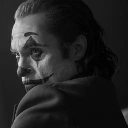

In [87]:
rows, cols = size
image = np.array(image)
bools = binarize_bools(image)
print(getsizeof(bools)*3)
ints = binarize(image)
print(getsizeof(ints)/getsizeof(bools))
Image.fromarray(de_binarize_bools(bools,rows,cols))